<a href="https://colab.research.google.com/github/Tanvir-Mahamood/Digital-Image-Processing/blob/main/DIP_Prac_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

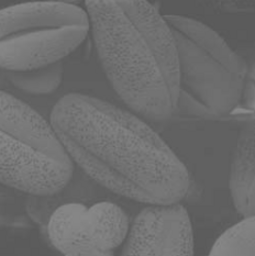

[[ 91  91  91 ...  92  93  93]
 [ 91  91  91 ...  91  92  92]
 [ 91  91  91 ...  92  91  91]
 ...
 [ 90  90  90 ... 121 121 121]
 [ 91  91  91 ... 121 121 121]
 [ 91  91  91 ... 121 121 121]]
(256, 255)


In [62]:
# 1. Source Image

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import matplotlib.pyplot as plt


image_path = "/content/drive/MyDrive/DIP_Image/Low Contrast.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
print(image)
print(image.shape)

max_intensity = 256
no_pixels = image.shape[0] * image.shape[1]


In [63]:
"""
image = np.array([[0, 1, 3, 1, 1],
                  [2, 5, 5, 2, 1],
                  [7, 3, 2, 4, 6],
                  [2, 2, 2, 1, 1],
                  [3, 2, 2, 2, 1]])

"""

'\nimage = np.array([[0, 1, 3, 1, 1],\n                  [2, 5, 5, 2, 1],\n                  [7, 3, 2, 4, 6],\n                  [2, 2, 2, 1, 1],\n                  [3, 2, 2, 2, 1]])\n\n'

Text(0, 0.5, 'Frequency')

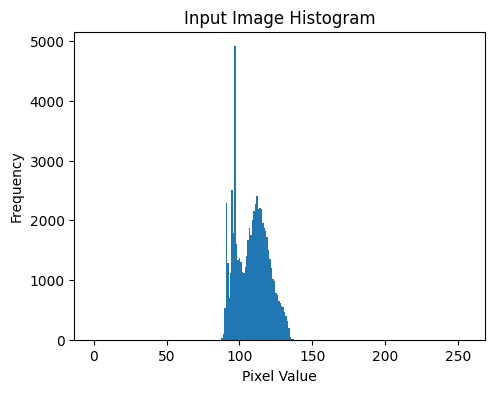

In [64]:
# 2. Histogram Plot
histogram = np.zeros(max_intensity, dtype=int)
pdf_pr = np.zeros(max_intensity, dtype=np.double)
cdf_sk = np.zeros(max_intensity, dtype=np.double)
sk = np.zeros(max_intensity, dtype=int)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value = image[i, j]
        histogram[pixel_value] += 1

pdf_pr = np.round(histogram / (image.shape[0] * image.shape[1]), 2)
cdf_sk = np.round(pdf_pr.cumsum(), 2)
sk_double = np.round(cdf_sk * (max_intensity - 1), 2)
sk = np.round(sk_double).astype(int)

plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.bar(range(max_intensity), histogram, width=1)
plt.title("Input Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")


In [65]:
print("r nk Pr(rk) Sk   round(Sk)")
np.set_printoptions(precision=2, suppress=True)
for r in range(max_intensity):
    print(f"{r}  {histogram[r]} {pdf_pr[r]}   {sk_double[r]} {sk[r]}")

r nk Pr(rk) Sk   round(Sk)
0  0 0.0   0.0 0
1  0 0.0   0.0 0
2  0 0.0   0.0 0
3  0 0.0   0.0 0
4  0 0.0   0.0 0
5  0 0.0   0.0 0
6  0 0.0   0.0 0
7  0 0.0   0.0 0
8  0 0.0   0.0 0
9  0 0.0   0.0 0
10  0 0.0   0.0 0
11  0 0.0   0.0 0
12  0 0.0   0.0 0
13  0 0.0   0.0 0
14  0 0.0   0.0 0
15  0 0.0   0.0 0
16  0 0.0   0.0 0
17  0 0.0   0.0 0
18  0 0.0   0.0 0
19  0 0.0   0.0 0
20  0 0.0   0.0 0
21  0 0.0   0.0 0
22  0 0.0   0.0 0
23  0 0.0   0.0 0
24  0 0.0   0.0 0
25  0 0.0   0.0 0
26  0 0.0   0.0 0
27  0 0.0   0.0 0
28  0 0.0   0.0 0
29  0 0.0   0.0 0
30  0 0.0   0.0 0
31  0 0.0   0.0 0
32  0 0.0   0.0 0
33  0 0.0   0.0 0
34  0 0.0   0.0 0
35  0 0.0   0.0 0
36  0 0.0   0.0 0
37  0 0.0   0.0 0
38  0 0.0   0.0 0
39  0 0.0   0.0 0
40  0 0.0   0.0 0
41  0 0.0   0.0 0
42  0 0.0   0.0 0
43  0 0.0   0.0 0
44  0 0.0   0.0 0
45  0 0.0   0.0 0
46  0 0.0   0.0 0
47  0 0.0   0.0 0
48  0 0.0   0.0 0
49  0 0.0   0.0 0
50  0 0.0   0.0 0
51  0 0.0   0.0 0
52  0 0.0   0.0 0
53  0 0.0   0.0 0
54  0 0.0  

Input Image:


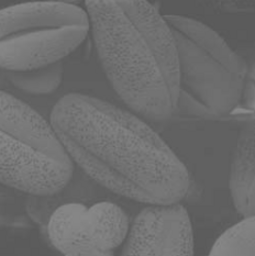

Histogram Equalized Image


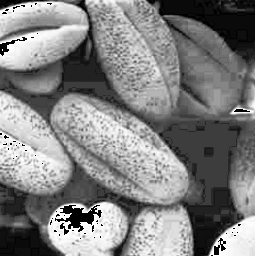

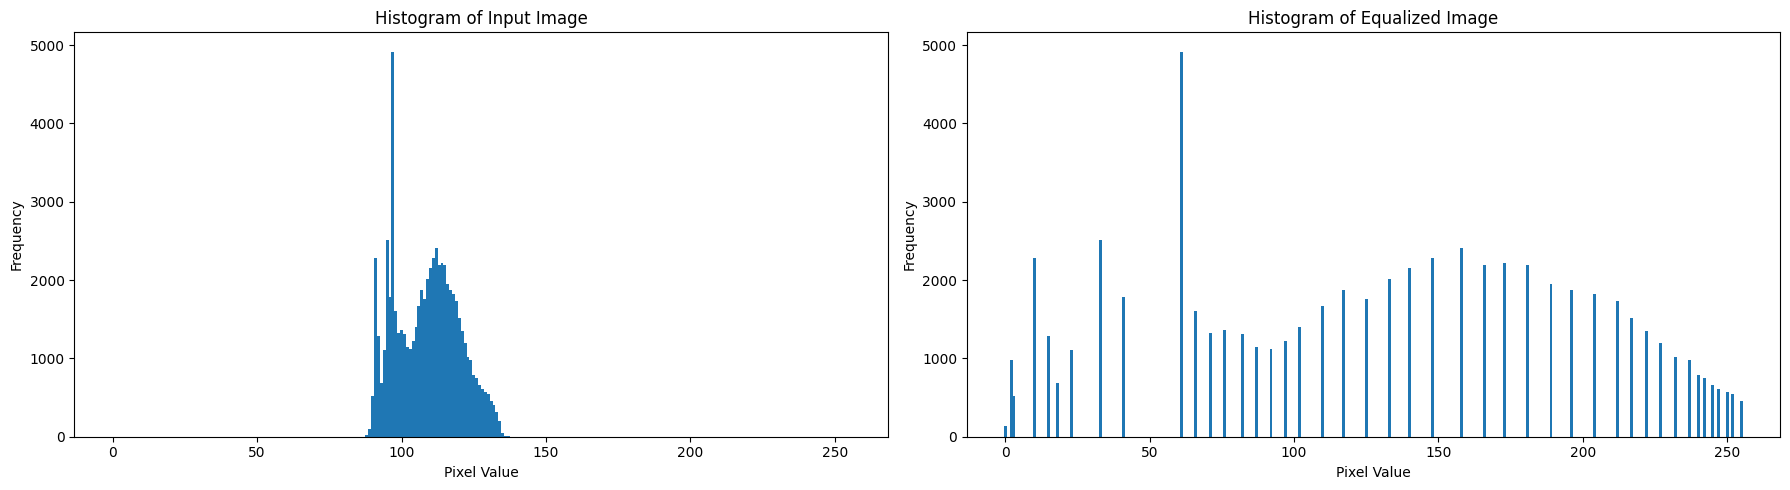

In [66]:
def sub_plot(graphs, titles, xlabels=None, ylabels=None, figsize=(18, 4)):
    """
    Generalized function to plot multiple bar/line charts side by side.

    graphs   : list of (x, y, type) where type = "bar" or "line"
    titles   : list of titles for each subplot
    xlabels  : list of x-axis labels (optional)
    ylabels  : list of y-axis labels (optional)
    figsize  : tuple for figure size
    """
    n = len(graphs)
    plt.figure(figsize=figsize)

    for i, (x, y, gtype) in enumerate(graphs, 1):
        plt.subplot(1, n, i)

        if gtype == "bar":
            plt.bar(x, y, width=1)
        elif gtype == "line":
            plt.plot(x, y)

        plt.title(titles[i-1])
        if xlabels and i-1 < len(xlabels):
            plt.xlabel(xlabels[i-1])
        if ylabels and i-1 < len(ylabels):
            plt.ylabel(ylabels[i-1])

    plt.tight_layout()
    plt.show()

# 3. Perform Histogram Equalization
equalized_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        original_pixel = image[i, j]
        equalized_image[i, j] = sk[original_pixel]

# print(equalized_image)

equalized_histogram = np.zeros(max_intensity, dtype=int)
for i in range(equalized_image.shape[0]):
    for j in range(equalized_image.shape[1]):
        pixel_value = equalized_image[i, j]
        equalized_histogram[pixel_value] += 1

print("Input Image:")
cv2_imshow(image)
print("Histogram Equalized Image")
cv2_imshow(equalized_image)
# Ploting
graphs = [
    (range(max_intensity), histogram, "bar"),
    (range(max_intensity), equalized_histogram, "bar"),
]
titles  = ["Histogram of Input Image", "Histogram of Equalized Image"]
xlabels = ["Pixel Value", "Pixel Value"]
ylabels = ["Frequency", "Frequency"]
sub_plot(graphs, titles, xlabels, ylabels, figsize=(18, 5))

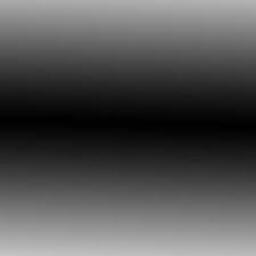

[[170 170 170 ... 179 179 179]
 [169 169 169 ... 178 178 178]
 [168 168 168 ... 177 177 177]
 ...
 [192 192 192 ... 184 184 184]
 [195 195 195 ... 185 185 185]
 [197 197 197 ... 186 186 186]]
(256, 256)


In [67]:
"""
target_image = np.array([[1, 1, 2, 3, 3],
                         [1, 2, 3, 3, 1],
                         [2, 3, 2, 2, 1],
                         [3, 1, 2, 2, 2],
                         [3, 1, 1, 2, 2]])

"""
# 4. Trarget Image
image_path = "/content/drive/MyDrive/DIP_Image/mask4.jpg"
target_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(target_image)
print(target_image)
print(target_image.shape)

In [68]:
# 5. Histogram Specification
target_histogram = np.zeros(max_intensity, dtype=int)

for i in range(target_image.shape[0]):
    for j in range(target_image.shape[1]):
        pixel_value = target_image[i, j]
        target_histogram[pixel_value] += 1

print(target_histogram)

[ 103  524 1263  649  417  705  595  725  478  551  540  731  438  388
  546  414  569  438  462  564  476  428  465  458  447  517  368  461
  505  433  405  433  356  432  341  377  405  397  465  389  315  415
  381  352  374  366  301  347  374  370  393  357  406  334  330  346
  375  390  313  280  346  367  315  413  316  358  262  329  367  373
  335  350  288  342  254  359  344  375  250  267  291  339  349  368
  375  299  294  251  335  281  332  310  343  271  340  282  282  289
  308  336  361  318  368  292  333  206  289  255  377  324  365  159
  316  223  364  327  474  254  310  239  350  291  382  266  293  237
  262  227  360  341  413  352  259  238  230  306  317  331  347  262
  290  244  350  365  330  296  347  266  351  275  318  336  263  317
  264  348  271  263  323  383  239  365  290  348  335  255  298  246
  320  304  358  297  373  247  255  184  254  227  215  161  174  136
  165  162  163  168  199   77  144  120   86  124   82   45    8   16
    0 

In [69]:
target_pdf = np.round(target_histogram / no_pixels, 2)
target_cdf = np.round(target_pdf.cumsum(), 2)
target_sk_double = np.round(target_cdf * (max_intensity - 1), 2)
target_sk = np.round(target_sk_double).astype(int)

print("Target Histogram:", target_histogram)
print("Target PDF:", target_pdf)
print("Target CDF:", target_cdf)
print("Target Sk (double):", target_sk_double)
print("Target Sk (int):", target_sk)

Target Histogram: [ 103  524 1263  649  417  705  595  725  478  551  540  731  438  388
  546  414  569  438  462  564  476  428  465  458  447  517  368  461
  505  433  405  433  356  432  341  377  405  397  465  389  315  415
  381  352  374  366  301  347  374  370  393  357  406  334  330  346
  375  390  313  280  346  367  315  413  316  358  262  329  367  373
  335  350  288  342  254  359  344  375  250  267  291  339  349  368
  375  299  294  251  335  281  332  310  343  271  340  282  282  289
  308  336  361  318  368  292  333  206  289  255  377  324  365  159
  316  223  364  327  474  254  310  239  350  291  382  266  293  237
  262  227  360  341  413  352  259  238  230  306  317  331  347  262
  290  244  350  365  330  296  347  266  351  275  318  336  263  317
  264  348  271  263  323  383  239  365  290  348  335  255  298  246
  320  304  358  297  373  247  255  184  254  227  215  161  174  136
  165  162  163  168  199   77  144  120   86  124   82   4

In [70]:
mapping = np.zeros(max_intensity, dtype=int)

for original_pixel_value in range(max_intensity):
    original_sk_value = sk[original_pixel_value]
    closest_target_index = np.argmin(np.abs(target_sk - original_sk_value))
    mapping[original_pixel_value] = closest_target_index

print("Mapping from Original Intensity to Target Intensity:")
for original_value, target_value in enumerate(mapping):
    print(f"Original: {original_value} -> Target: {target_value}")

Mapping from Original Intensity to Target Intensity:
Original: 0 -> Target: 0
Original: 1 -> Target: 0
Original: 2 -> Target: 0
Original: 3 -> Target: 0
Original: 4 -> Target: 0
Original: 5 -> Target: 0
Original: 6 -> Target: 0
Original: 7 -> Target: 0
Original: 8 -> Target: 0
Original: 9 -> Target: 0
Original: 10 -> Target: 0
Original: 11 -> Target: 0
Original: 12 -> Target: 0
Original: 13 -> Target: 0
Original: 14 -> Target: 0
Original: 15 -> Target: 0
Original: 16 -> Target: 0
Original: 17 -> Target: 0
Original: 18 -> Target: 0
Original: 19 -> Target: 0
Original: 20 -> Target: 0
Original: 21 -> Target: 0
Original: 22 -> Target: 0
Original: 23 -> Target: 0
Original: 24 -> Target: 0
Original: 25 -> Target: 0
Original: 26 -> Target: 0
Original: 27 -> Target: 0
Original: 28 -> Target: 0
Original: 29 -> Target: 0
Original: 30 -> Target: 0
Original: 31 -> Target: 0
Original: 32 -> Target: 0
Original: 33 -> Target: 0
Original: 34 -> Target: 0
Original: 35 -> Target: 0
Original: 36 -> Targe

In [71]:
specified_image = np.zeros_like(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        original_pixel_value = image[i, j]
        specified_image[i, j] = mapping[original_pixel_value]

print(specified_image)

[[  3   3   3 ...   5   6   6]
 [  3   3   3 ...   3   5   5]
 [  3   3   3 ...   5   3   3]
 ...
 [  1   1   1 ... 120 120 120]
 [  3   3   3 ... 120 120 120]
 [  3   3   3 ... 120 120 120]]


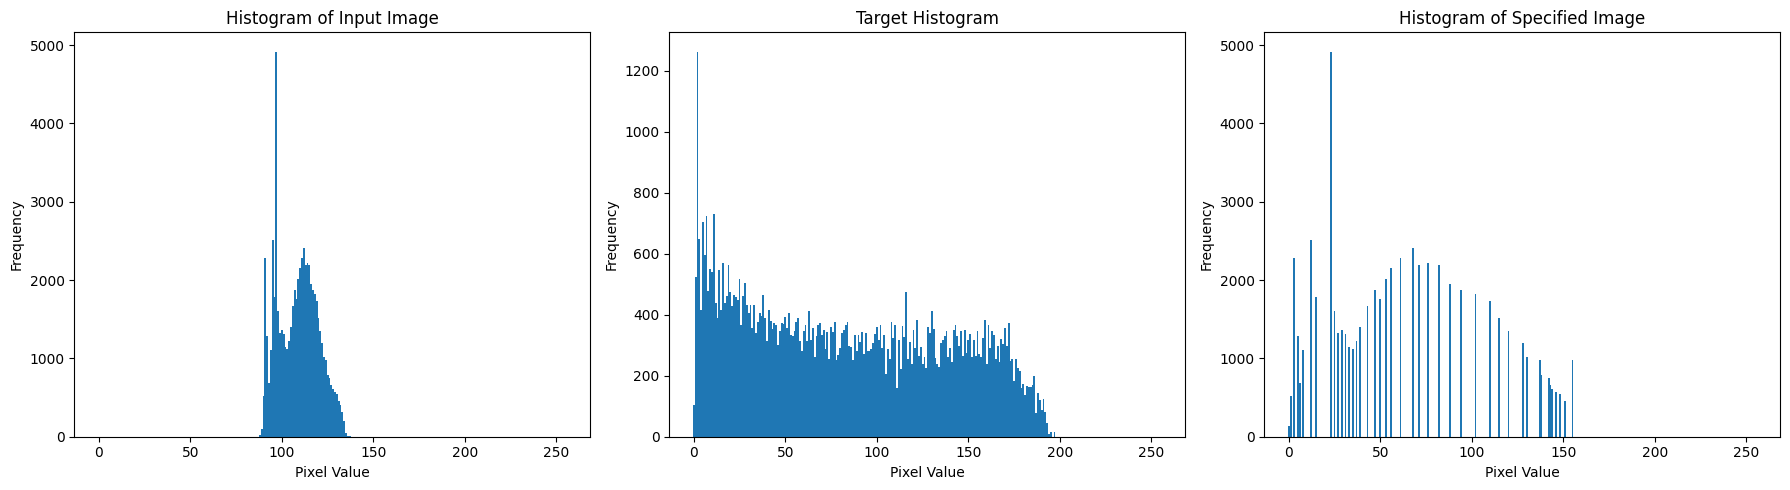

Input Image


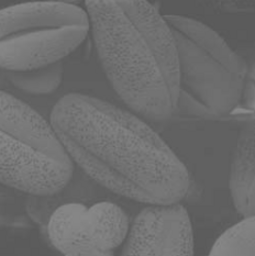

Histogram Equalized Image


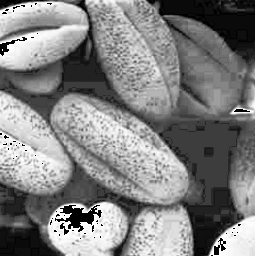

Histogram Specified Image


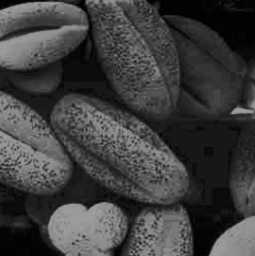

In [72]:
specified_histogram = np.zeros(max_intensity, dtype=int)
for i in range(specified_image.shape[0]):
    for j in range(specified_image.shape[1]):
        pixel_value = specified_image[i, j]
        specified_histogram[pixel_value] += 1

graphs = [
    (range(max_intensity), histogram[:max_intensity], "bar"),
    (range(max_intensity), target_histogram[:max_intensity], "bar"),
    (range(max_intensity), specified_histogram[:max_intensity], "bar"),
]
titles  = ["Histogram of Input Image", "Target Histogram", "Histogram of Specified Image"]
xlabels = ["Pixel Value"] * 3
ylabels = ["Frequency"] * 3
sub_plot(graphs, titles, xlabels, ylabels, figsize=(18, 5))

print("Input Image")
cv2_imshow(image)
print("Histogram Equalized Image")
cv2_imshow(equalized_image)
print("Histogram Specified Image")
cv2_imshow(specified_image)